<a href="https://colab.research.google.com/github/seeedata/OUTTA-AI-BOOTCAMP/blob/main/0718%20Clustering_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab_data/hyundi_preprocessed.csv', index_col=0)

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [ ]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]
df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [ ]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)

# 클러스터링 수행
y_km = km.fit_predict(df_new)

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


<ipython-input-6-7550b7331b8e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [ ]:
# 클러스터 중심점 확인
centers = km.cluster_centers_
centers

array([[10729.16575923,  2016.40653358, 29905.9092559 ],
       [14975.66877221,  2018.12791157,  9088.58823529],
       [ 8117.26600985,  2014.00492611, 60669.93103448]])

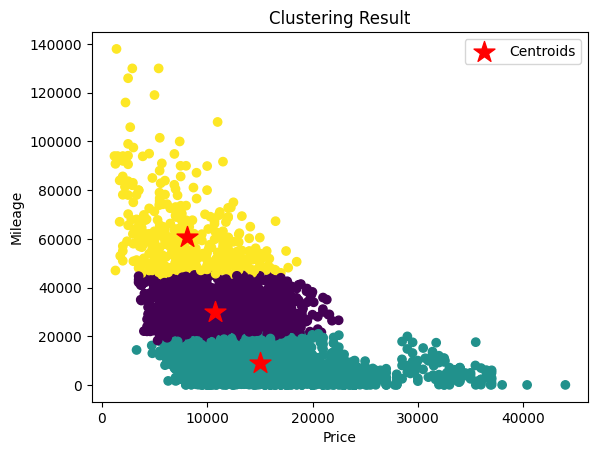

In [ ]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x = df_new['price'], y = df_new['mileage'], c = y_km, cmap = 'viridis')
# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x = centers[:, 0], y= centers[:, 2], marker='*', s=250, color='red', label='Centroids')

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab_data/hyundi_preprocessed.csv', index_col=0); df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


In [ ]:
df.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,9.497169,2017.143728,12840.655488,0.643510,21142.825348,0.847561,124.853005,53.078615,1.471537
std,3.273424,1.918801,5907.108300,1.114783,17357.974725,1.086871,54.638025,11.016039,0.380804
min,0.000000,2000.000000,1200.000000,0.000000,1.000000,0.000000,20.000000,28.000000,1.000000
25%,6.000000,2016.000000,8200.000000,0.000000,8304.500000,0.000000,125.000000,44.800000,1.200000
50%,10.000000,2017.000000,12058.500000,0.000000,17168.500000,0.000000,145.000000,55.400000,1.600000
75%,12.000000,2019.000000,15795.000000,2.000000,30532.250000,2.000000,145.000000,60.100000,1.700000
max,15.000000,2020.000000,43995.000000,3.000000,138000.000000,3.000000,330.000000,78.500000,2.900000


## 회귀분석으로 가격에 영향을 미치는 유의한 변수를 선택하자

### scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.466667,0.85,0.158874,0.000000,0.125407,0.000000,0.403226,0.611881,0.105263
1,0.800000,0.80,0.310761,0.666667,0.182842,0.666667,0.693548,0.306931,0.526316
2,0.800000,0.80,0.238322,0.000000,0.274466,0.666667,0.032258,0.667327,0.368421
3,0.333333,0.80,0.123823,0.000000,0.172378,0.000000,0.000000,0.635644,0.000000
4,0.400000,0.75,0.210282,0.000000,0.240408,0.666667,0.451613,0.463366,0.526316
...,...,...,...,...,...,...,...,...,...
4587,1.000000,0.95,0.672859,1.000000,0.011348,0.666667,0.403226,0.233663,0.631579
4588,0.600000,0.75,0.154925,0.000000,0.431213,0.666667,0.032258,0.746535,0.368421
4589,0.333333,0.85,0.131557,0.000000,0.100066,0.000000,0.000000,0.635644,0.000000
4590,0.800000,0.90,0.298960,0.000000,0.168929,0.000000,0.403226,0.332673,0.315789


### 변수 간 correlation을 heatmap으로 표현

In [ ]:
corr = df_scaled.corr()
corr

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.263101,0.750079,0.390303,-0.071479,0.620555,0.243590,-0.169773,0.705748
year,0.263101,1.000000,0.579491,0.141673,-0.718346,-0.013514,0.247107,-0.165499,-0.039711
price,0.750079,0.579491,1.000000,0.491467,-0.446682,0.435426,0.313535,-0.351620,0.569788
transmission,0.390303,0.141673,0.491467,1.000000,-0.106616,0.384796,0.295471,-0.096696,0.381954
mileage,-0.071479,-0.718346,-0.446682,-0.106616,1.000000,0.178882,-0.164643,0.157284,0.191388
fuelType,0.620555,-0.013514,0.435426,0.384796,0.178882,1.000000,0.027022,0.366631,0.672672
tax,0.243590,0.247107,0.313535,0.295471,-0.164643,0.027022,1.000000,-0.425274,0.258367
mpg,-0.169773,-0.165499,-0.351620,-0.096696,0.157284,0.366631,-0.425274,1.000000,-0.288521
engineSize,0.705748,-0.039711,0.569788,0.381954,0.191388,0.672672,0.258367,-0.288521,1.000000


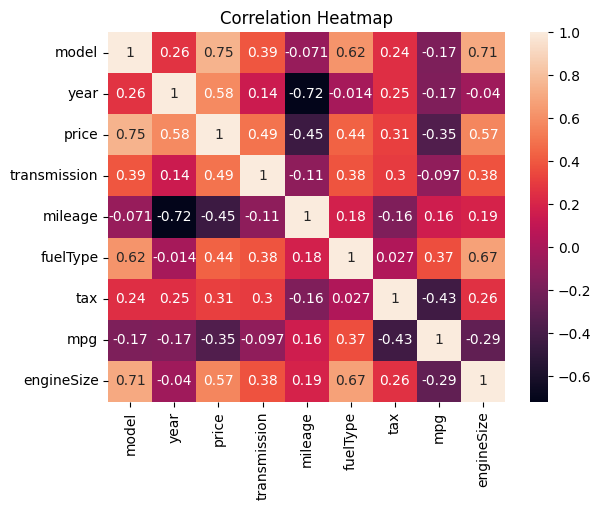

In [ ]:
import seaborn as sns
sns.heatmap(df_scaled.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

mileage&year -0.72, enginesize&model 0.71

회귀분석을 진행한 후, 유의성에 따라 연관성이 높은 변수를 제거한다.

model은 price와 관련성이 크므로 제거하면 안 된다.

### linear regression

In [ ]:
df_scaled.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
X_scaled = df_scaled[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']]
y_scaled = df_scaled[['price']]

In [ ]:
import statsmodels.api as sm

X_scaled_intercept = sm.add_constant(X_scaled)

model = sm.OLS(y_scaled, X_scaled_intercept)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     3082.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:47:09   Log-Likelihood:                 6833.1
No. Observations:                4592   AIC:                        -1.365e+04
Df Residuals:                    4583   BIC:                        -1.359e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0904      0.013     -6.926   

모든 변수들이 다 유의하다... R^2도 0.843으로 좋은 편이다.

year와 enginesize를 제외하고 회귀분석을 진행해보자

In [ ]:
X_scaled = df_scaled[['model', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg']]
y_scaled = df_scaled[['price']]

In [ ]:
import statsmodels.api as sm

X_scaled_intercept = sm.add_constant(X_scaled)

model = sm.OLS(y_scaled, X_scaled_intercept)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3331.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:53:29   Log-Likelihood:                 6432.4
No. Observations:                4592   AIC:                        -1.285e+04
Df Residuals:                    4585   BIC:                        -1.281e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2479      0.006     40.912   

In [ ]:
df_scaled.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

mileage, enginesize 제거해보자

In [ ]:
X_scaled = df_scaled[['model', 'year', 'transmission', 'fuelType', 'tax',
       'mpg']]
y_scaled = df_scaled[['price']]

X_scaled_intercept = sm.add_constant(X_scaled)

model = sm.OLS(y_scaled, X_scaled_intercept)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3439.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:07:05   Log-Likelihood:                 6492.3
No. Observations:                4592   AIC:                        -1.297e+04
Df Residuals:                    4585   BIC:                        -1.293e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3147      0.009    -35.588   

## Kmeans clustering

In [ ]:
#데이터 전처리
X = df_scaled[['model', 'year', 'transmission', 'fuelType', 'tax', 'mpg']]
X

,model,year,transmission,fuelType,tax,mpg
0,0.466667,0.85,0.000000,0.000000,0.403226,0.611881
1,0.800000,0.80,0.666667,0.666667,0.693548,0.306931
2,0.800000,0.80,0.000000,0.666667,0.032258,0.667327
3,0.333333,0.80,0.000000,0.000000,0.000000,0.635644
4,0.400000,0.75,0.000000,0.666667,0.451613,0.463366
...,...,...,...,...,...,...
4587,1.000000,0.95,1.000000,0.666667,0.403226,0.233663
4588,0.600000,0.75,0.000000,0.666667,0.032258,0.746535
4589,0.333333,0.85,0.000000,0.000000,0.000000,0.635644
4590,0.800000,0.90,0.000000,0.000000,0.403226,0.332673


In [ ]:
X.isna().sum()

model           0
year            0
transmission    0
fuelType        0
tax             0
mpg             0
dtype: int64

In [ ]:
df['price'].describe()

count     4592.000000
mean     12840.655488
std       5907.108300
min       1200.000000
25%       8200.000000
50%      12058.500000
75%      15795.000000
max      43995.000000
Name: price, dtype: float64

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 21):
    X = df_scaled[['model', 'year', 'transmission', 'fuelType', 'tax', 'mpg']]
    print('i =', i)
    km = KMeans(n_clusters = i,
                init = 'random',
                n_init = 10,
                max_iter = 300,
                tol = 1e-04,
                random_state = 28)
    cluster = km.fit_predict(X)
    silhouette = silhouette_score(X, cluster)  #성능평가
    kmeansdf = pd.DataFrame(X)
    kmeansdf['cluster'] = cluster
    kmeansdf['price'] = df['price']

    print(kmeansdf)
    print(kmeansdf.groupby('cluster').mean()['price'].sort_values(ascending=False))
    print('Silhouette Score =', silhouette)
    print('\n')

i = 2
         model  year  transmission  fuelType       tax       mpg  cluster  \
0     0.466667  0.85      0.000000  0.000000  0.403226  0.611881        0   
1     0.800000  0.80      0.666667  0.666667  0.693548  0.306931        1   
2     0.800000  0.80      0.000000  0.666667  0.032258  0.667327        0   
3     0.333333  0.80      0.000000  0.000000  0.000000  0.635644        0   
4     0.400000  0.75      0.000000  0.666667  0.451613  0.463366        0   
...        ...   ...           ...       ...       ...       ...      ...   
4587  1.000000  0.95      1.000000  0.666667  0.403226  0.233663        1   
4588  0.600000  0.75      0.000000  0.666667  0.032258  0.746535        0   
4589  0.333333  0.85      0.000000  0.000000  0.000000  0.635644        0   
4590  0.800000  0.90      0.000000  0.000000  0.403226  0.332673        0   
4591  0.800000  0.80      0.666667  0.666667  0.338710  0.586139        1   

        price  
0      7999.0  
1     14499.0  
2     11399.0  
3    

실루엣 점수를 봤을 때, i=12로 한다.

In [ ]:
X = df_scaled[['model', 'year', 'transmission', 'fuelType', 'tax', 'mpg']]
km12 = KMeans(n_clusters = 12,
                init = 'random',
                n_init = 10,
                max_iter = 300,
                tol = 1e-04,
                random_state = 28)
cluster = km12.fit_predict(X)
kmeansdf12 = pd.DataFrame(X)
kmeansdf12['cluster'] = cluster
kmeansdf12['price'] = df['price']
print(kmeansdf12)
print('\n')
print(kmeansdf12.groupby('cluster').mean()['price'])

         model  year  transmission  fuelType       tax       mpg  cluster  \
0     0.466667  0.85      0.000000  0.000000  0.403226  0.611881       11   
1     0.800000  0.80      0.666667  0.666667  0.693548  0.306931        2   
2     0.800000  0.80      0.000000  0.666667  0.032258  0.667327       10   
3     0.333333  0.80      0.000000  0.000000  0.000000  0.635644        3   
4     0.400000  0.75      0.000000  0.666667  0.451613  0.463366        7   
...        ...   ...           ...       ...       ...       ...      ...   
4587  1.000000  0.95      1.000000  0.666667  0.403226  0.233663        2   
4588  0.600000  0.75      0.000000  0.666667  0.032258  0.746535        5   
4589  0.333333  0.85      0.000000  0.000000  0.000000  0.635644        3   
4590  0.800000  0.90      0.000000  0.000000  0.403226  0.332673        0   
4591  0.800000  0.80      0.666667  0.666667  0.338710  0.586139        2   

        price  
0      7999.0  
1     14499.0  
2     11399.0  
3      6499

In [ ]:
kmeansdf12['cluster'].value_counts()

11    1038
0      862
2      573
3      535
10     306
6      278
4      254
9      215
8      183
1      152
5      100
7       96
Name: cluster, dtype: int64

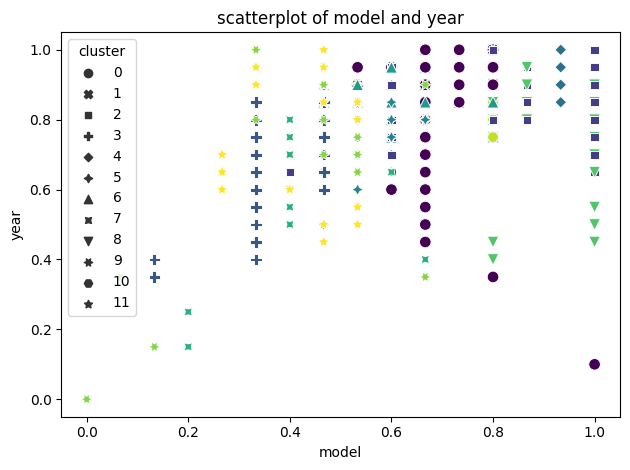

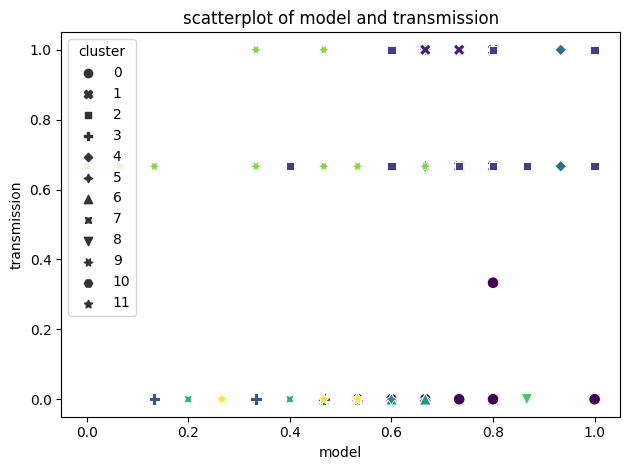

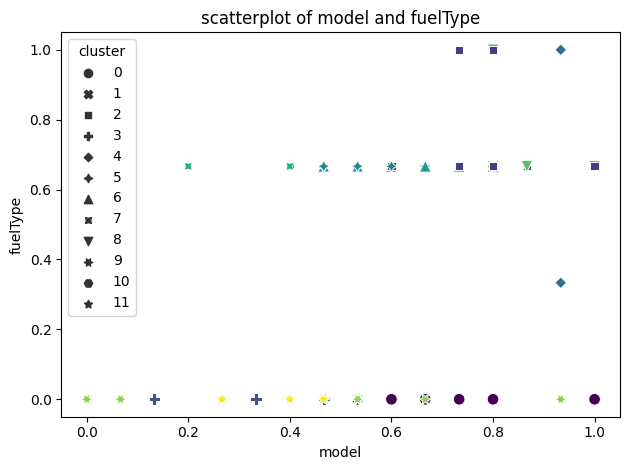

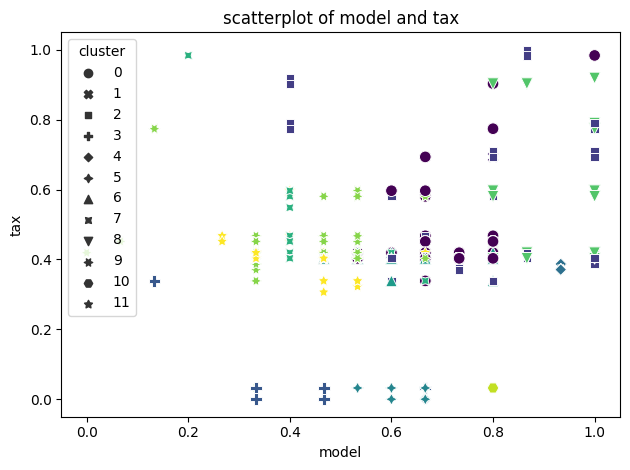

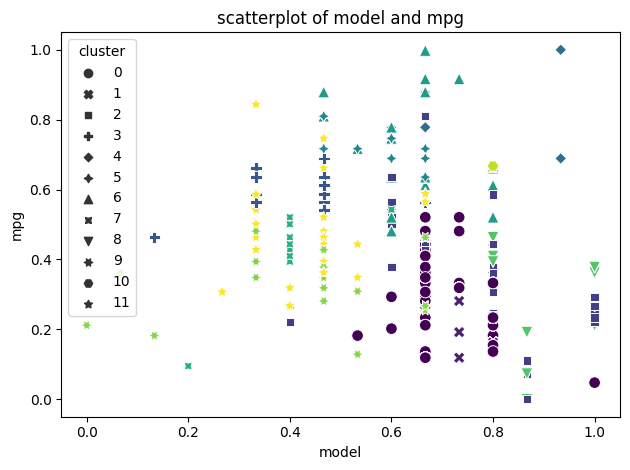

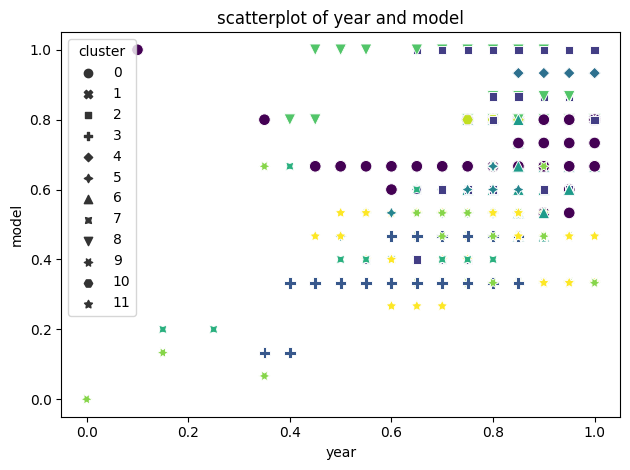

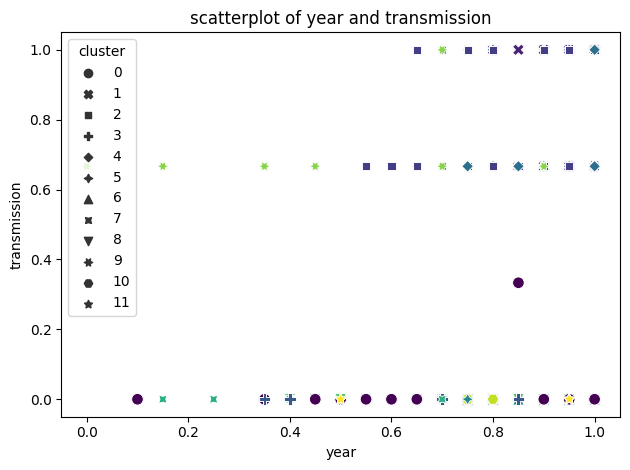

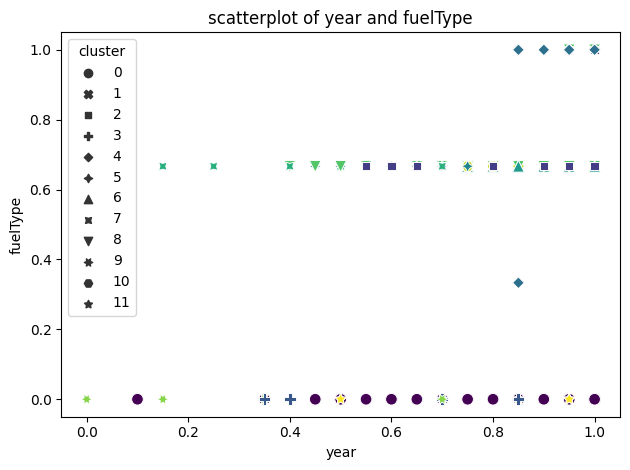

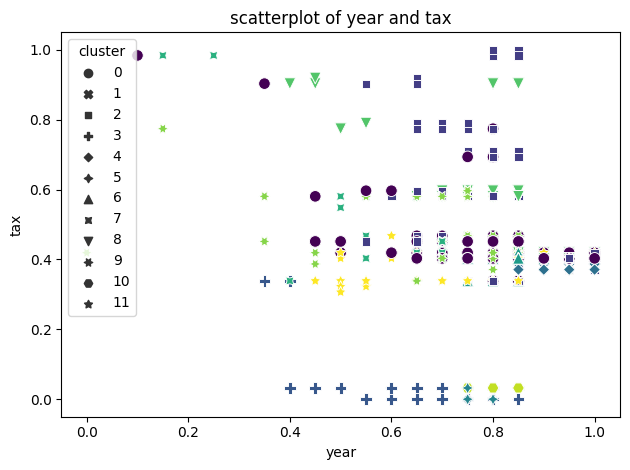

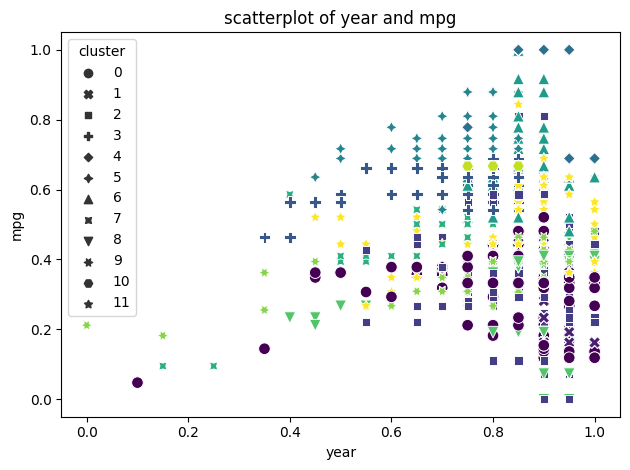

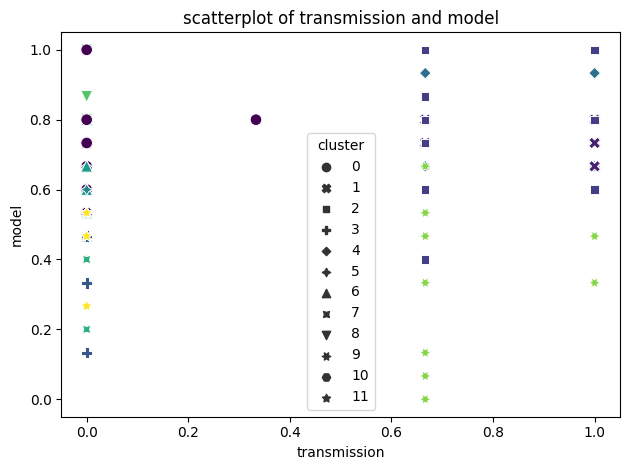

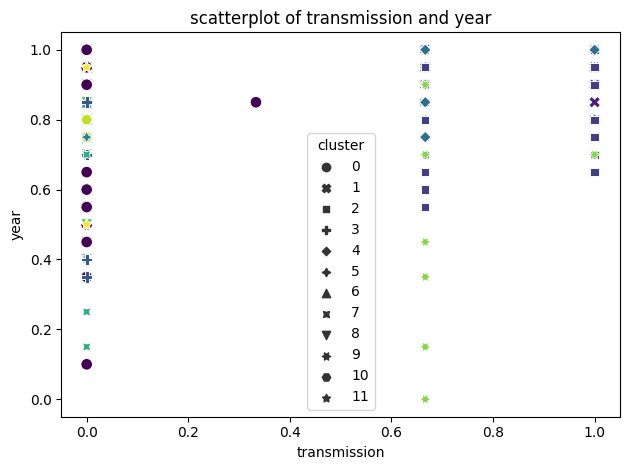

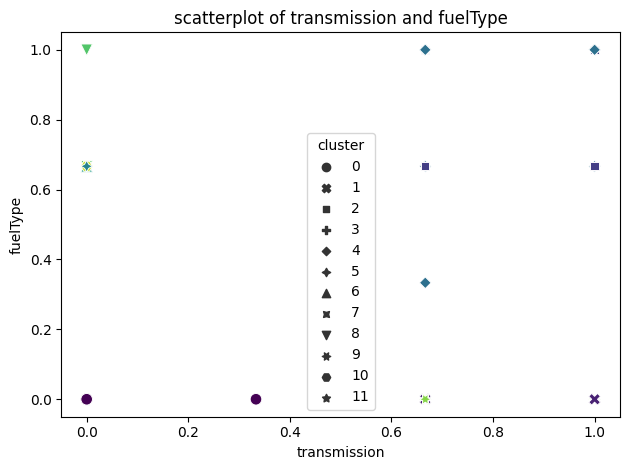

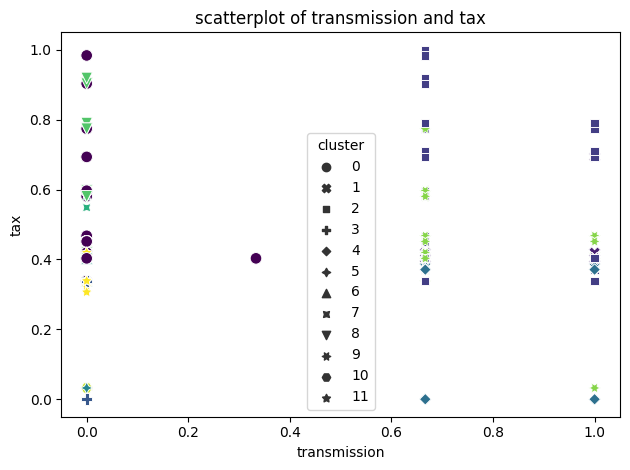

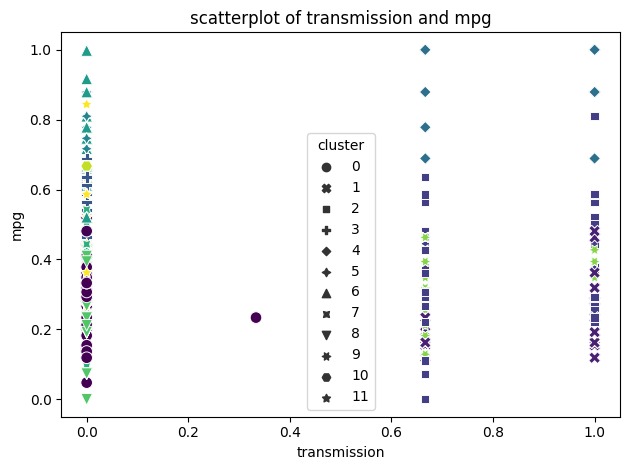

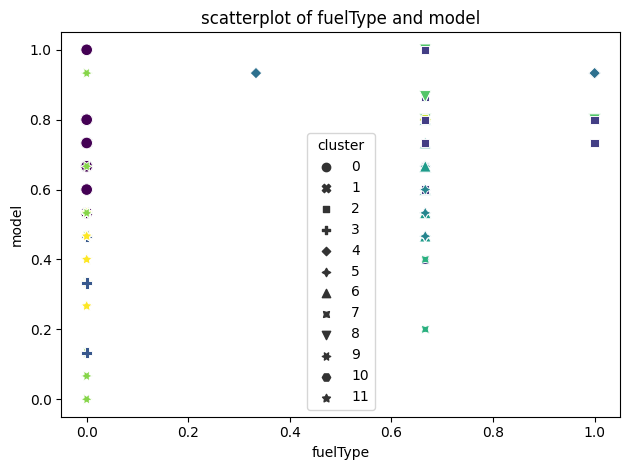

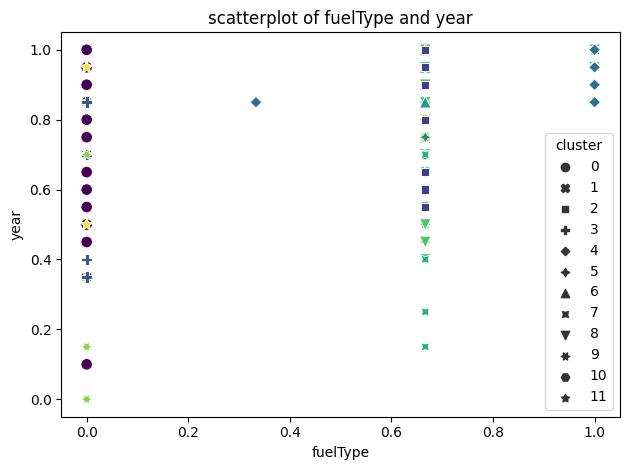

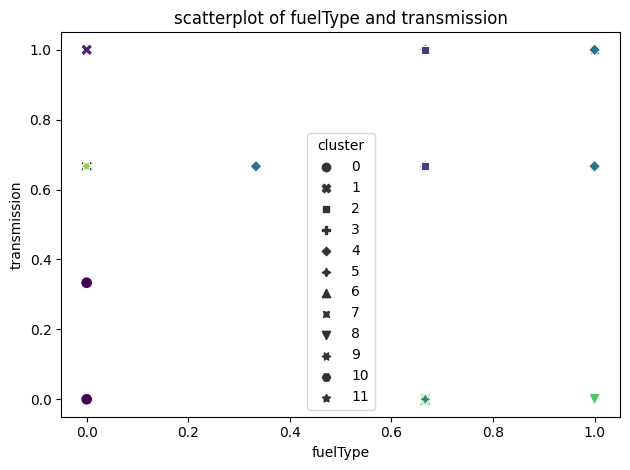

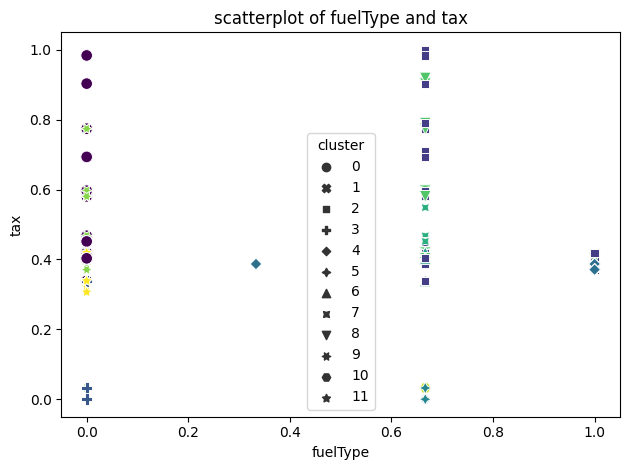

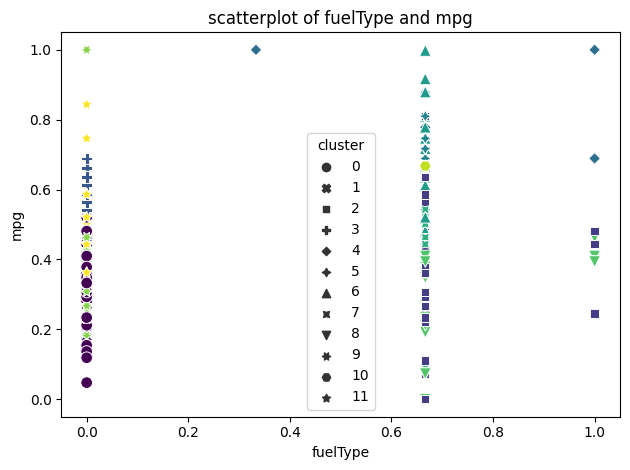

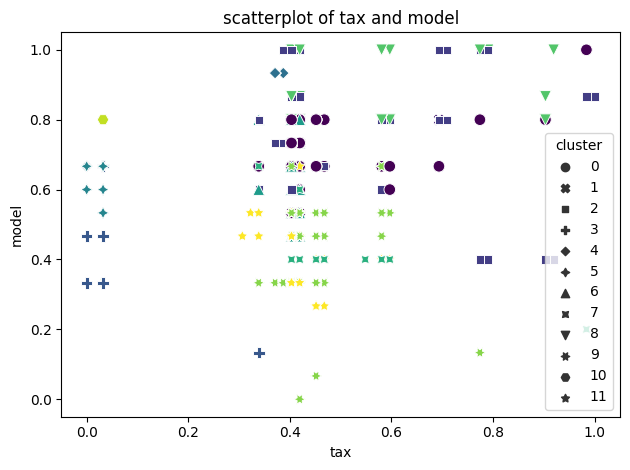

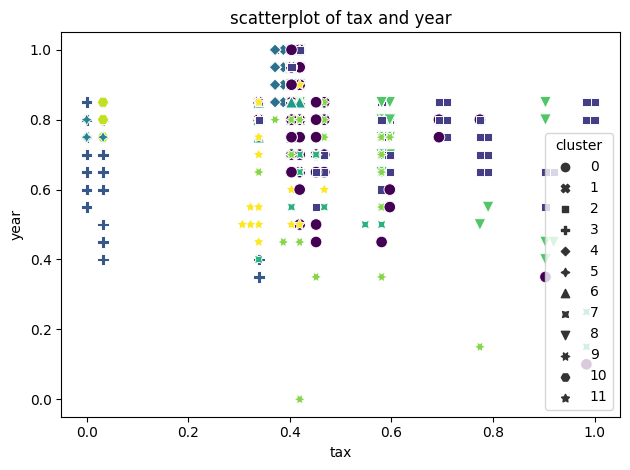

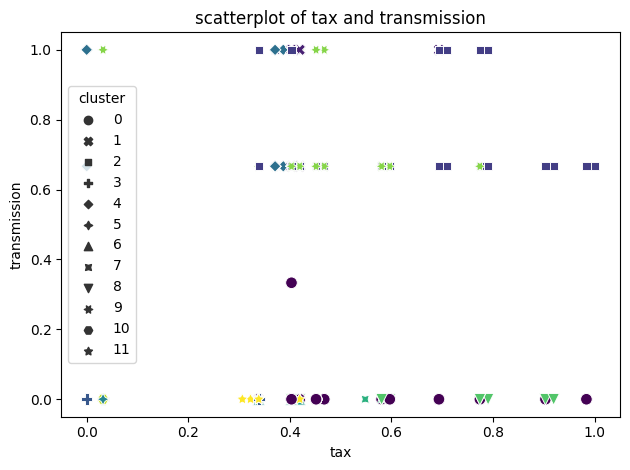

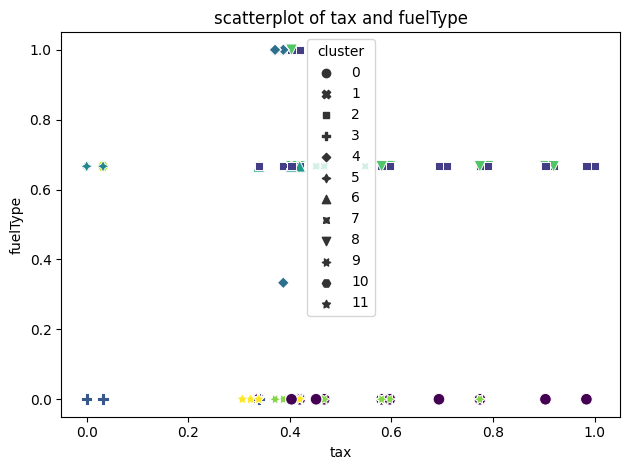

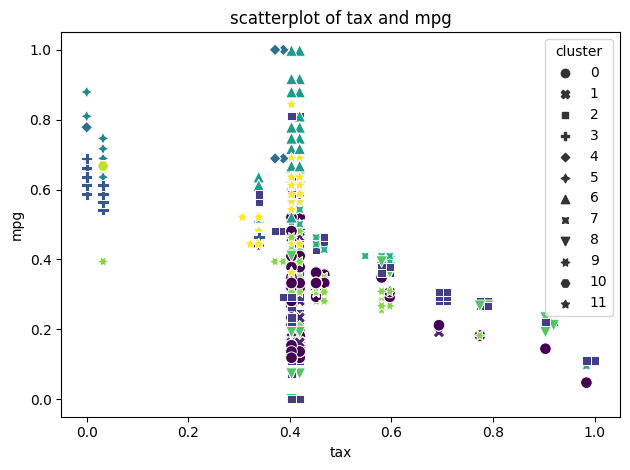

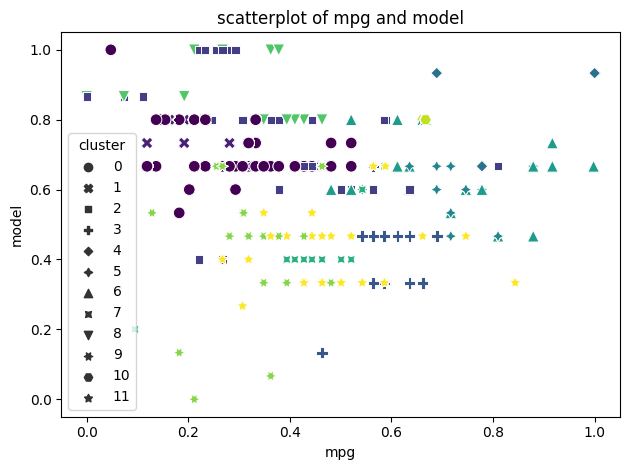

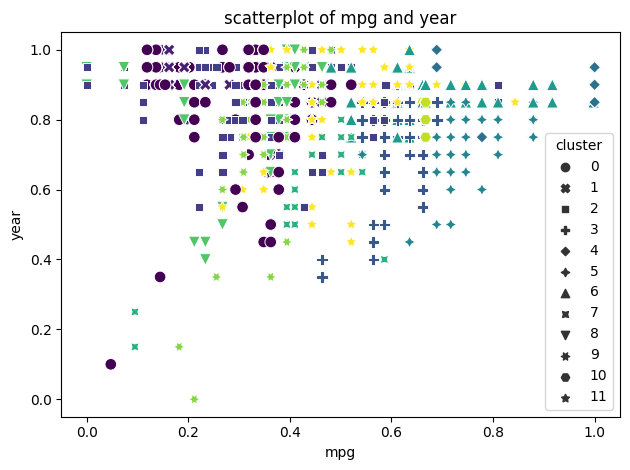

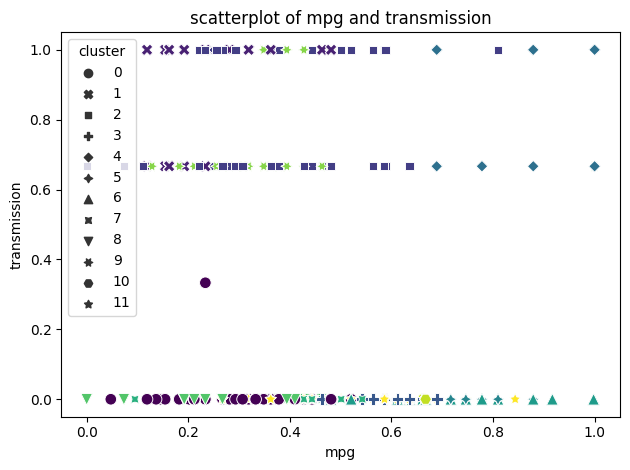

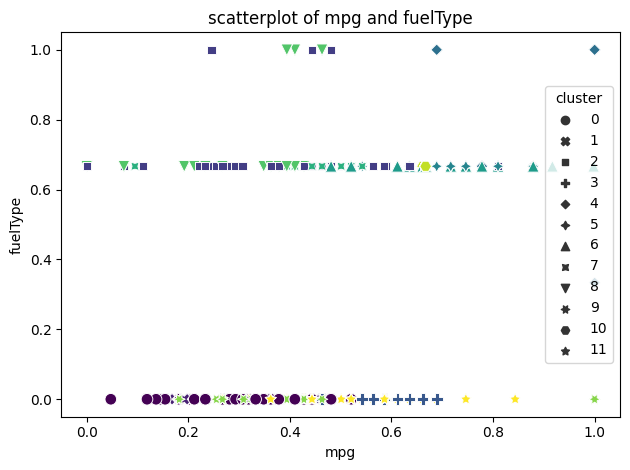

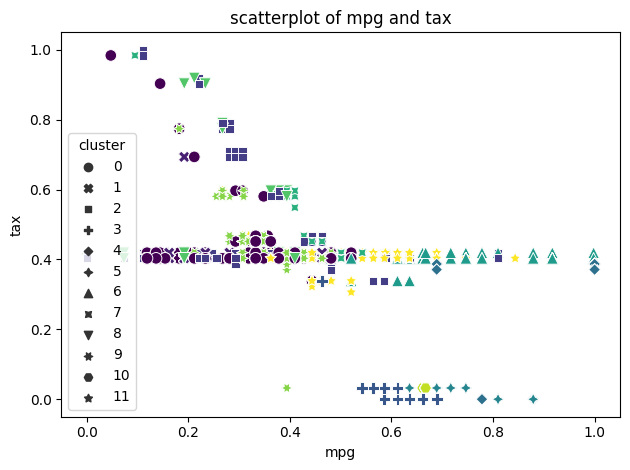

In [ ]:
column = ['model', 'year', 'transmission', 'fuelType', 'tax', 'mpg']
for i in column:
    for j in column:
        if i != j:
            plt.title(f'scatterplot of {i} and {j}')
            sns.scatterplot(x=kmeansdf12[i], y=kmeansdf12[j], c=kmeansdf12['cluster'], style=kmeansdf12['cluster'], s=70)
            plt.tight_layout()
            plt.show()
        else:
            continue